In [1]:
from dotenv import load_dotenv
load_dotenv()
import os


In [2]:
#os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [3]:
# GraphState 요소는 상태를 전달하는 용도로 사용됩니다.
class State(TypedDict):
    # 메시지 정의(list type 이며 add_messages 함수를 사용하여 메시지를 추가)
    messages: Annotated[list, add_messages]
    node_ids: list[str]

In [11]:
# Node 정의

from langchain_openai import ChatOpenAI

# LLM 정의
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

def task_a(state: State):
    # 메시지 호출 및 반환
    messages = llm.invoke(state["messages"])
    node_ids = []
    node_ids.append("I am Node A")
    print(node_ids)
    return {"node_ids": node_ids, "messages" : messages}
    #return state

def task_b(state: State):
    node_ids = state["node_ids"]
    node_ids.append("I am Node B")
    print(node_ids)
    return state

def task_c(state: State):
    node_ids = state["node_ids"]
    node_ids.append("I am Node C")
    print(node_ids)
    return state

def task_d(state: State):
    node_ids = state["node_ids"]
    print(node_ids)
    node_ids.append("I am Node D")
    return state
# Graph 정의
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver


# langgraph.graph에서 StateGraph와 END를 가져옵니다.
workflow = StateGraph(State)

# Todo 를 작성합니다.
workflow.add_node("a", task_a)  # 에이전트 노드를 추가합니다.

# Todo 작업을 시작합니다.
workflow.add_node("b", task_b)

# 작업을 진행합니다.
workflow.add_node("c", task_c)

# 작업을 중간 체크합니다.
workflow.add_node("d", task_d)

# 각 노드들을 연결합니다.
workflow.add_edge("a", "b")
workflow.add_edge("b", "c")
workflow.add_edge("c", "d")
workflow.add_edge("d", END)

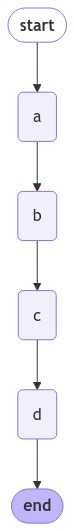

In [12]:
# 시작점을 설정합니다.
workflow.set_entry_point("a")

# 기록을 위한 메모리 저장소를 설정합니다.
#memory = MemorySaver()

# 그래프를 컴파일합니다.
app = workflow.compile()

# Visualize the Graph

from IPython.display import Image, display

try:
    display(
        Image(app.get_graph(xray=True).draw_mermaid_png())
    )  # 실행 가능한 객체의 그래프를 mermaid 형식의 PNG로 그려서 표시합니다. 
       # xray=True는 추가적인 세부 정보를 포함합니다.
except:
    # 이 부분은 추가적인 의존성이 필요하며 선택적으로 실행됩니다.
    pass


In [13]:
# Simple Start
app.invoke({"node_ids": ["Hello"]})

BadRequestError: Error code: 400 - {'error': {'message': "Invalid 'messages': empty array. Expected an array with minimum length 1, but got an empty array instead.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'empty_array'}}

In [14]:
# Start with Question
question = "서울의 유명한 맛집 TOP 10 추천해줘"

# 그래프 이벤트 스트리밍
response = app.invoke({"messages": [("user", question)]})

response



['I am Node A']
['I am Node A', 'I am Node B']
['I am Node A', 'I am Node B', 'I am Node C']
['I am Node A', 'I am Node B', 'I am Node C']


{'messages': [HumanMessage(content='서울의 유명한 맛집 TOP 10 추천해줘', id='2617ae6c-6814-43bb-9938-9323fe575a57'),
  AIMessage(content="서울에는 다양한 맛집이 많아서 선택하기가 쉽지 않지만, 다음은 서울에서 유명한 맛집 TOP 10을 추천해 드립니다. 각 식당은 고유의 매력을 가지고 있으니 참고해 보세요!\n\n1. **광장시장** - 전통 시장으로, 빈대떡, 마약김밥, 떡볶이 등 다양한 길거리 음식을 즐길 수 있습니다.\n\n2. **부암동 카페거리** - 예쁜 카페와 맛있는 디저트가 많은 곳으로, 특히 '카페 드 파리'의 생과일 빙수가 유명합니다.\n\n3. **이태원 앤틱 가구 거리** - 다양한 국제 요리를 즐길 수 있는 곳으로, '부리또'와 '타코'가 인기 있는 멕시코 음식점들이 많습니다.\n\n4. **명동 교자** - 칼국수와 만두가 유명한 맛집으로, 항상 많은 사람들이 줄 서서 기다리는 곳입니다.\n\n5. **삼청동 수제비** - 수제비와 전통 한식을 맛볼 수 있는 곳으로, 아늑한 분위기에서 식사를 즐길 수 있습니다.\n\n6. **신사동 가로수길** - 다양한 트렌디한 카페와 레스토랑이 모여 있는 곳으로, '브런치 카페'가 특히 인기가 많습니다.\n\n7. **종로 통인시장** - 다양한 전통 음식을 한 곳에서 즐길 수 있는 시장으로, 특히 '김밥'과 '떡볶이'가 유명합니다.\n\n8. **홍대** - 다양한 음식점과 카페가 밀집해 있는 지역으로, '홍대 돈부리'와 '홍대 피자'가 인기입니다.\n\n9. **압구정 로데오 거리** - 고급 레스토랑과 카페가 많은 곳으로, '스시'와 '프렌치 레스토랑'이 특히 유명합니다.\n\n10. **여의도 한강공원** - 한강을 바라보며 피크닉을 즐길 수 있는 곳으로, 다양한 푸드트럭과 간편식이 인기가 많습니다.\n\n각 지역마다 특색 있는 음식과 분위기를 즐길 수 있으니, 방문해 보시길 추천합니다!", additio